## **Q1**

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cutlets = pd.read_csv('Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
cutlets.isnull().sum()   #Checking null values

Unit A    0
Unit B    0
dtype: int64

In [6]:
cutlets[cutlets.duplicated()].shape #checking duplicate values

(0, 2)

In [7]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [8]:
cutlets.info()  #Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


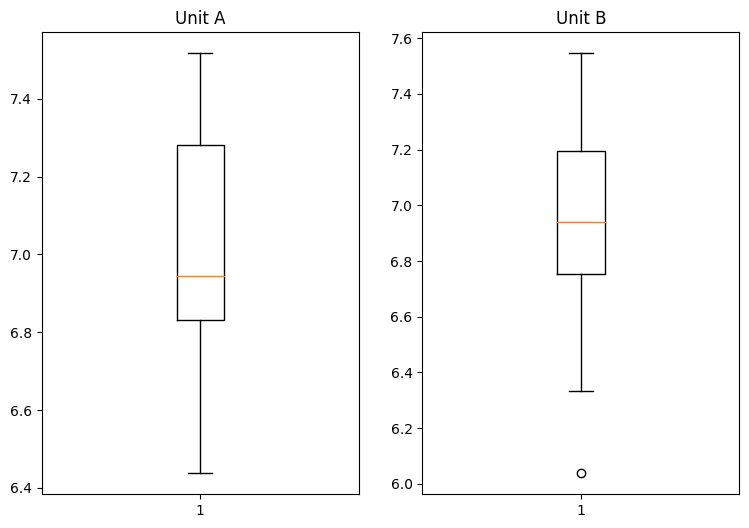

In [8]:
#Plotting the data
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title("Unit A")
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title("Unit B")
plt.show()

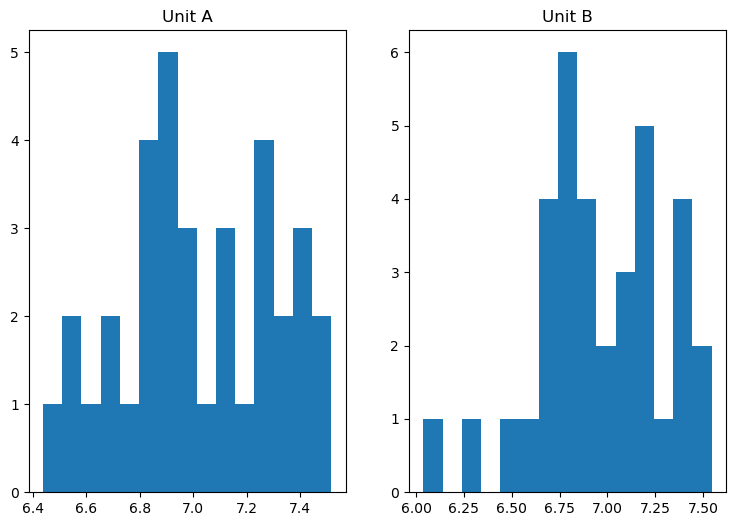

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins=15)
plt.title("Unit A")
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins=15)
plt.title("Unit B")
plt.show()

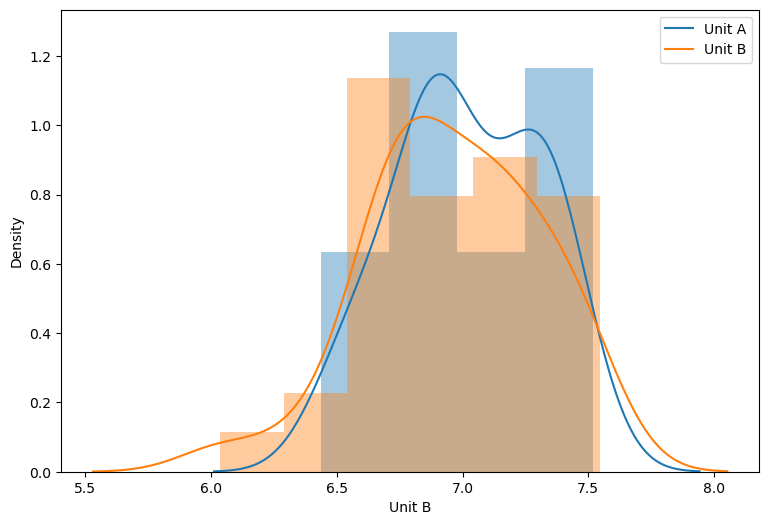

In [10]:
plt.figure(figsize=(9,6))
labels = ['Unit A','Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'], hist = True)
plt.legend(labels)

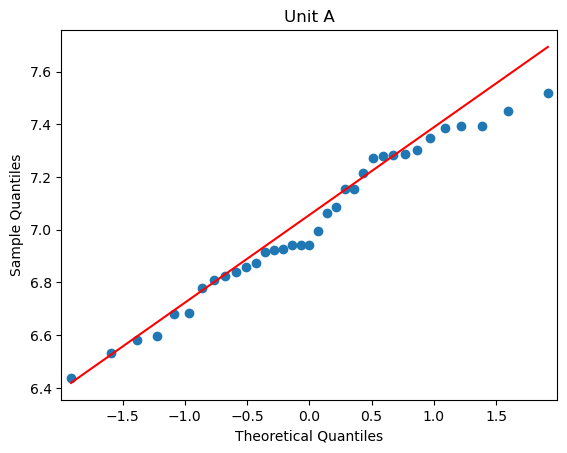

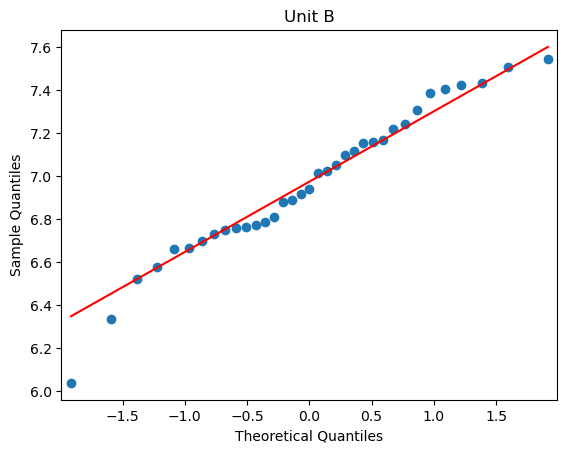

In [11]:
#Plotting Q-Q plot to check normal distribution
sm.qqplot(cutlets['Unit A'], line='q')
plt.title('Unit A')
sm.qqplot(cutlets['Unit B'], line='q')
plt.title('Unit B')
plt.show()

In [12]:
#Comparing evidences with hypothesis using t-statistics
statistic, p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=', p_value)

p_value= 0.47223947245995


In [13]:
alpha = 0.05
print('Significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
  print('We reject Null Hypothesis there is a significant difference between two Units A and B')
else:
  print('We fail to reject Null hypothesis and there is no significant difference between two samples')

Significance=0.050, p=0.472
We fail to reject Null hypothesis and there is no significant difference between two samples


## **Q2**

In [15]:
labtat = pd.read_csv('LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [16]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [18]:
labtat[labtat.duplicated()].shape

(0, 4)

In [19]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [20]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


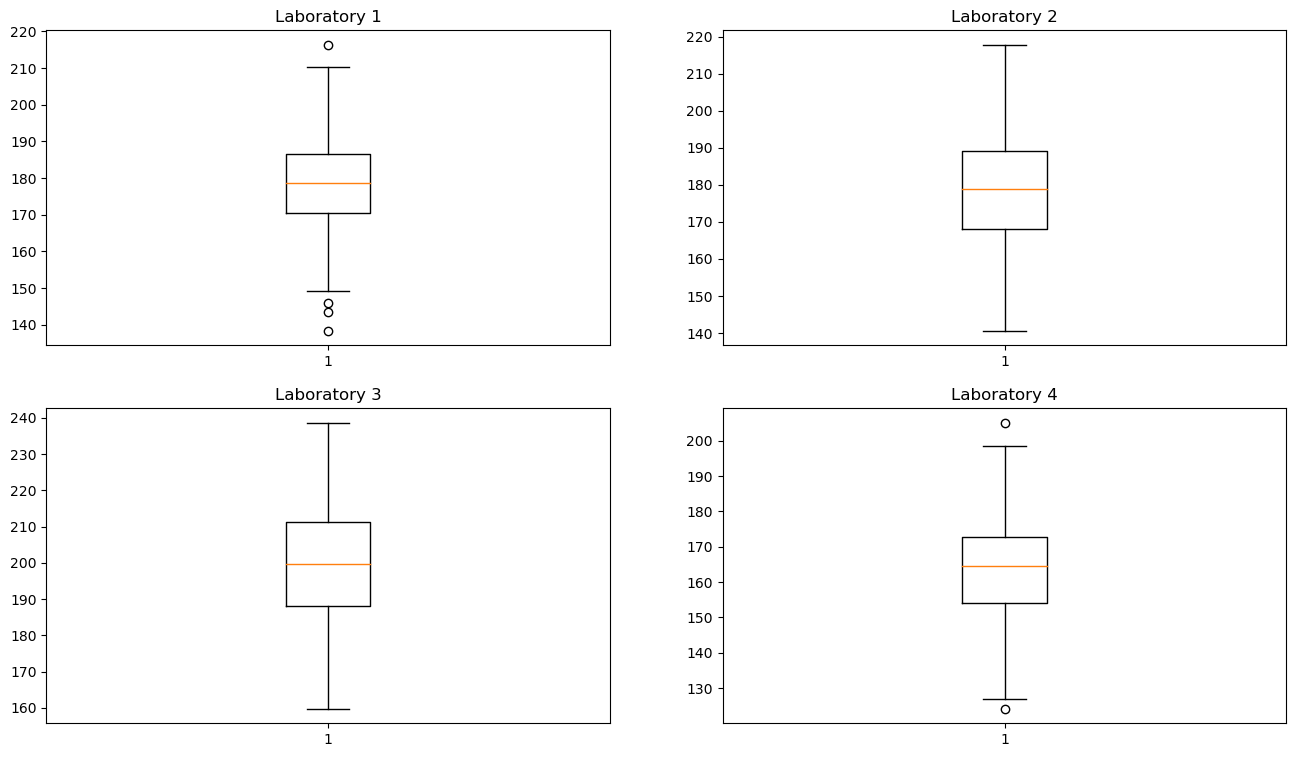

In [21]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

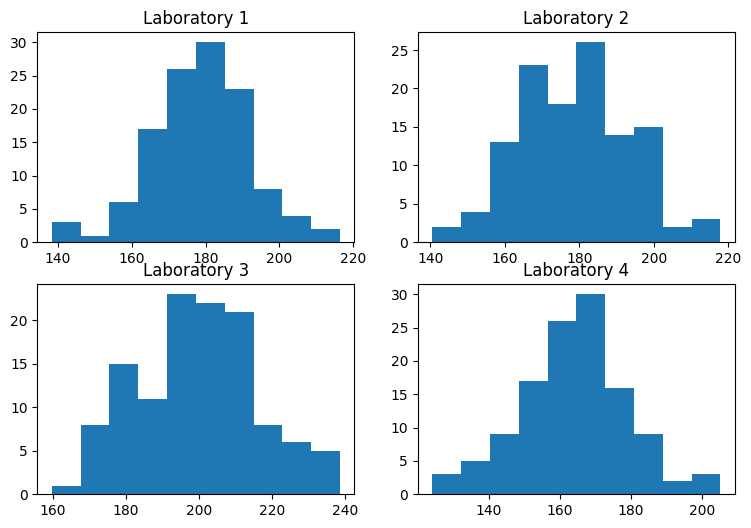

In [21]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

In [22]:
statistic, p_value =stats.f_oneway(labtat.iloc[0:,0],labtat.iloc[0:,1],labtat.iloc[0:,2],labtat.iloc[0:,3])
print('p_value=',p_value)

p_value= 2.1156708949992414e-57


In [23]:
alpha = 0.05
print('Significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
  print('We reject Null Hypothesis there is a significant difference in average TAT')
else:
  print('We fail to reject Null hypothesis and there is no significant difference between two samples')

Significance=0.050, p=0.000
We reject Null Hypothesis there is a significant difference in average TAT


## **Q3**

In [26]:
from scipy import stats as stats

In [28]:
buyer_ratio= pd.read_csv('BuyerRatio.csv')
buyer_ratio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [29]:
table = buyer_ratio.iloc[:,1:6]
table

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [30]:
table.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [31]:
val = stats.chi2_contingency(table)
val

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [32]:
type(val)

scipy.stats.contingency.Chi2ContingencyResult

In [33]:
no_of_rows = len(table.iloc[0:2,0])
no_of_columns = len(table.iloc[0,0:4])
degree_of_f = (no_of_rows)*(no_of_columns-1)
print('Degree of Freedom', degree_of_f)

Degree of Freedom 6


In [34]:
Expected_value = val[3]
Expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [35]:
from scipy.stats import chi2
chi_sq = sum([(o - e)**2/e for o,e in zip(table.values,Expected_value)])
chi_sq_statistic = chi_sq[0] + chi_sq[1]
chi_sq_statistic

1.5152956451130446

In [36]:
critical_value = chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [37]:
if chi_sq_statistic >= critical_value:
  print('Dependent (Reject Ho)')
else:
  print('Independent (fail to rject Ho)')

Independent (fail to rject Ho)


## **Q4**

In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [39]:
customer_order = pd.read_csv('Costomer+OrderForm.csv')
customer_order.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [40]:
print(customer_order['Phillippines'].value_counts(),customer_order['Indonesia'].value_counts(),customer_order['Malta'].value_counts(),customer_order['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 Error Free    280
Defective      20
Name: India, dtype: int64


In [41]:
observed = ([[271,267,269,280],[29,33,31,20]])
observed

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [42]:
stat, p, dof, expected = chi2_contingency(observed)

In [43]:
stat

3.858960685820355

In [44]:
p

0.2771020991233135

In [45]:
print('dof=%d' % dof)
print(expected)

dof=3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [46]:
alpha = 0.05
print('significane=%.3f, p=%.3f' % (alpha,p))
if p <= alpha:
  print('Dependent (reject Ho)')
else:
  print('Independent (fail to reject Ho)')

significane=0.050, p=0.277
Independent (fail to reject Ho)
